# Overview

This notebook demonstrates how to calculate and update the Matrix Profile for a sample dataset (this is the same example signal used in https://github.com/aouyang1/go-matrixprofile)

# Load Libraries

In [1]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load and visualize sample data

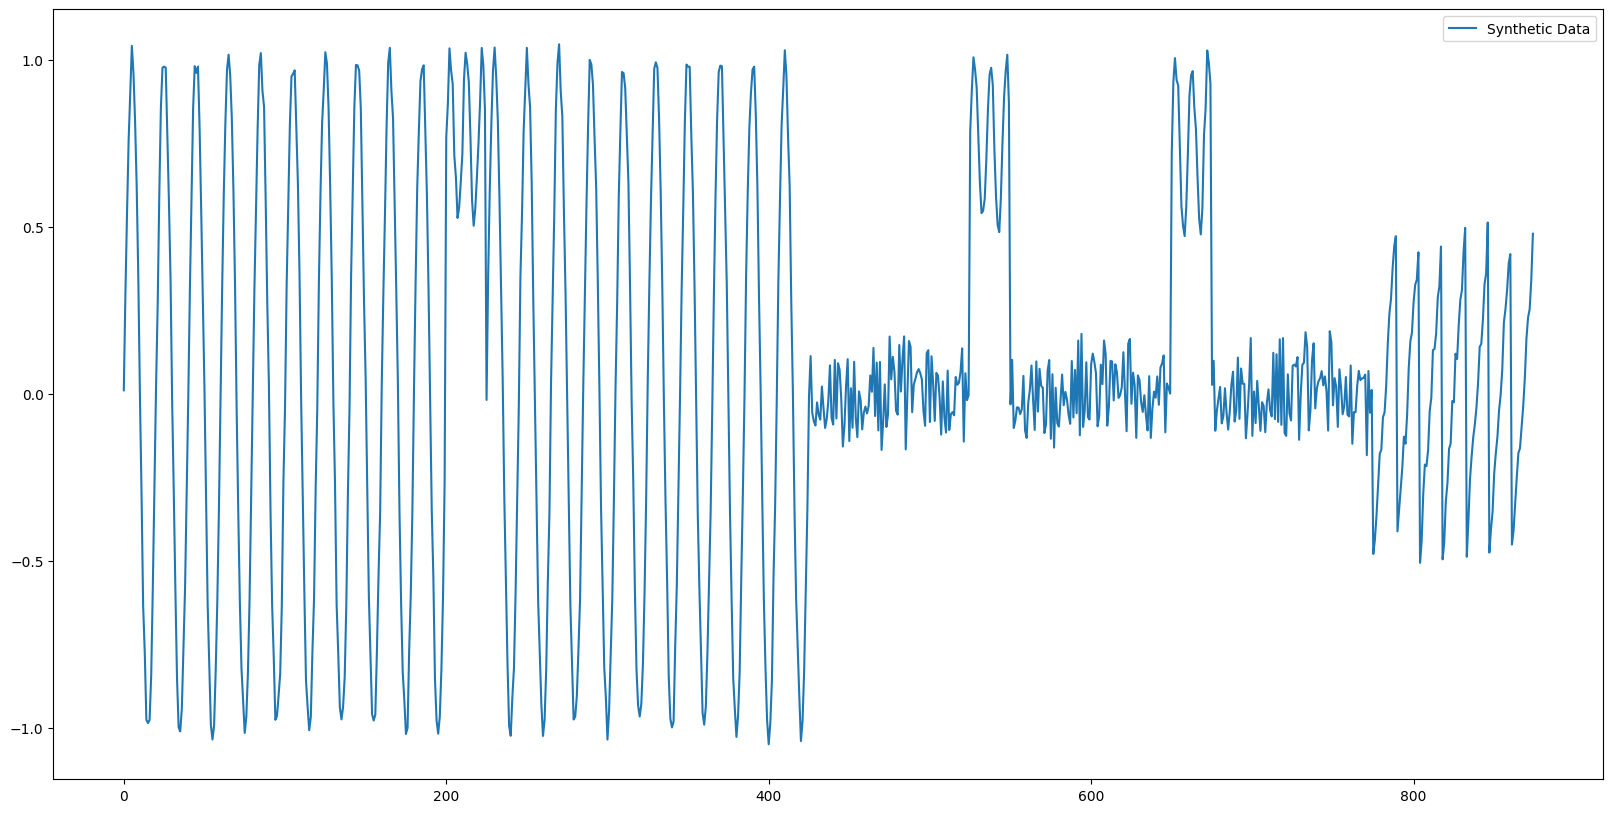

In [2]:
data = pd.read_csv("rawdata.csv")
pattern = data.data.values

#Plot data
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
legend = ax1.legend(loc='upper right')

# Calculate the Matrix Profile

## **v=1**

In [3]:
m = 32
v = 1
mp = matrixProfile.stmp(pattern, m, v)


Text(0.5, 0, 'Sample')

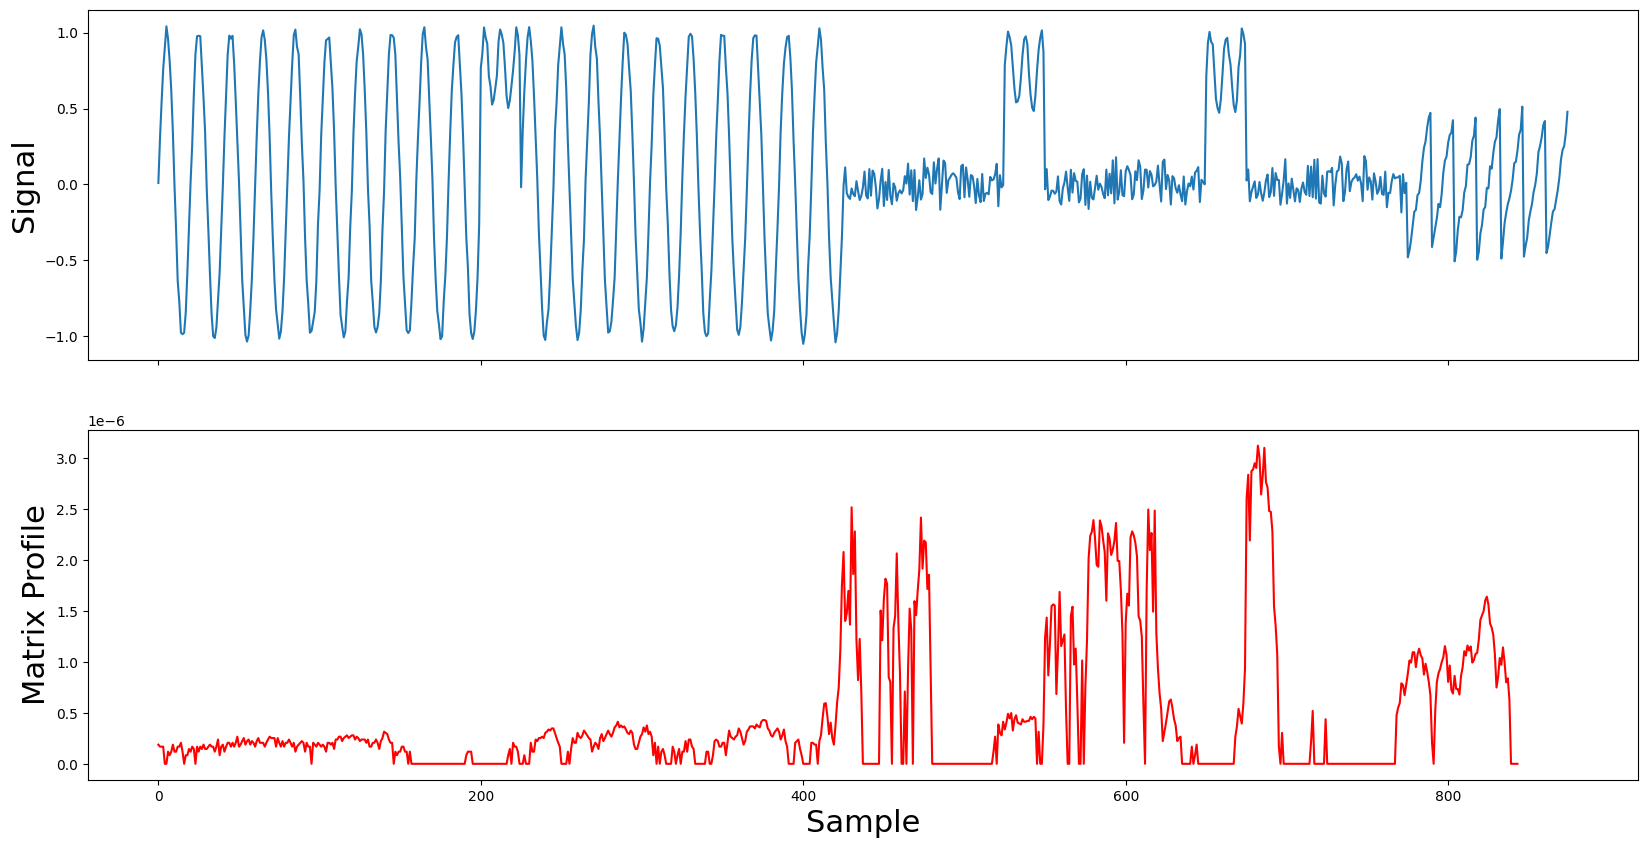

In [4]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)




## **v=2**

In [5]:
m = 32
v = 2
mp, mpi = matrixProfile.stmp(pattern, m, v)


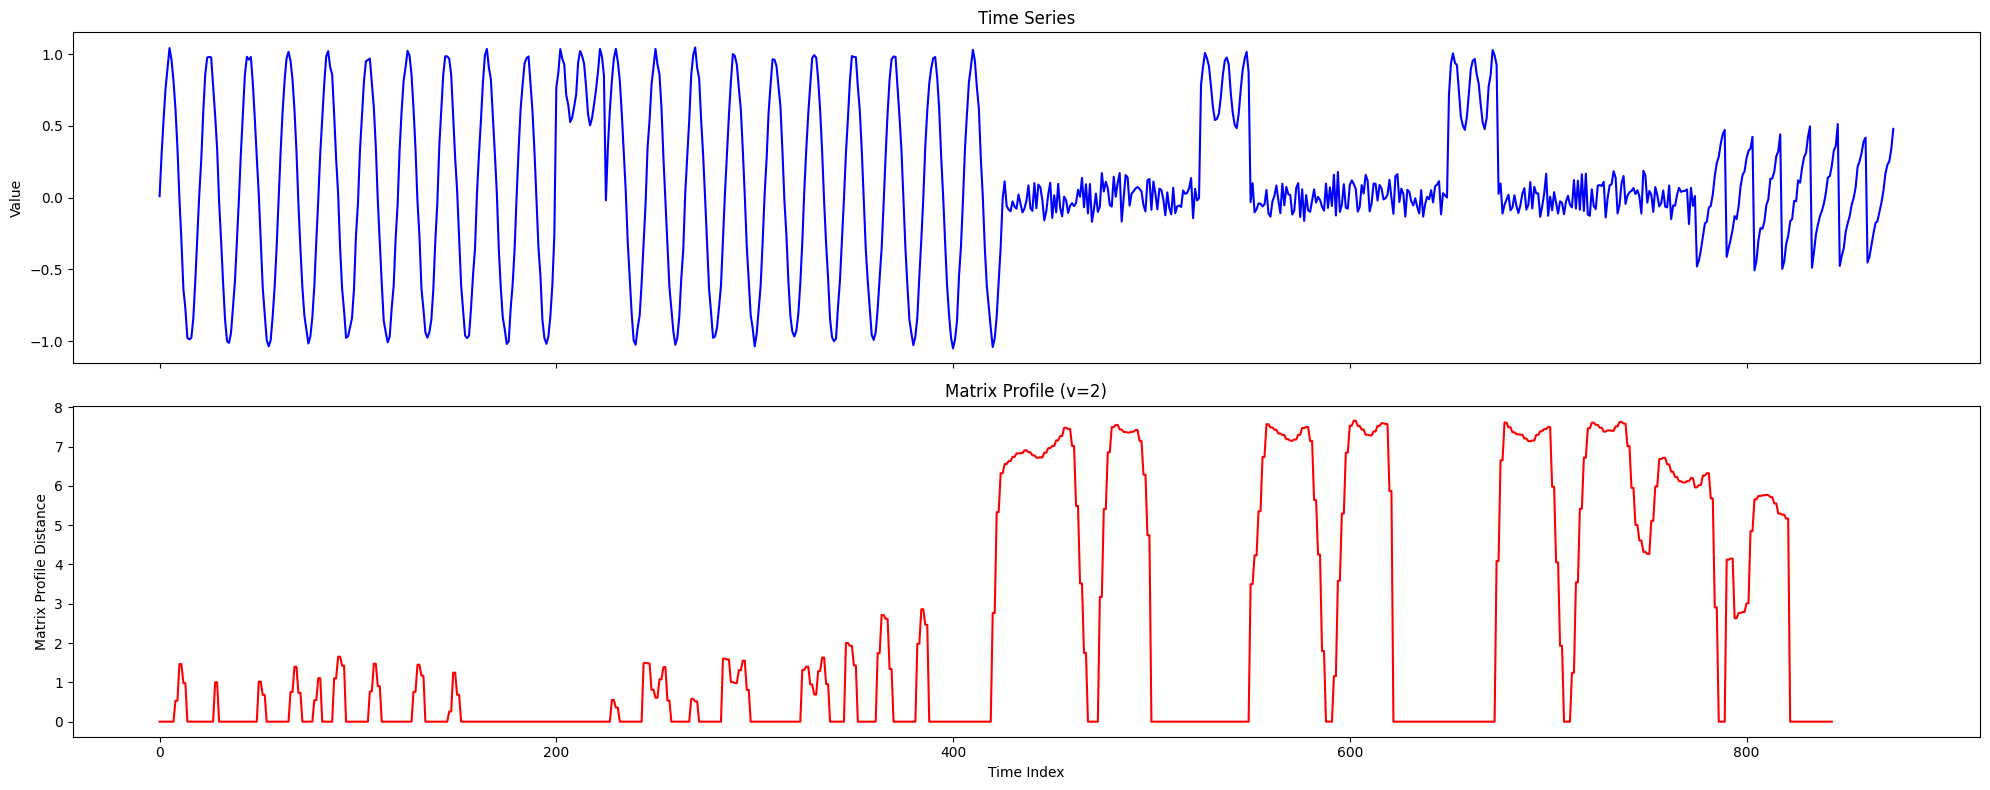

In [6]:
#to plot the matrix profile with v>1 we need to manage the Nan value we create skipping indexes in the distance profile and the in the Matrix profile

# create an NaN array for fulll lenght
mp_full = np.full_like(mp, np.nan)
#only the indexes we calculate (every v index)
valid_indices = np.arange(0, len(mp), v)

# copy the valid values
mp_full[valid_indices] = mp[valid_indices]

# replace NaN with the precedent value to create a continuous line
mp_filled = mp_full.copy()
for i in range(1, len(mp_filled)):
    if np.isnan(mp_filled[i]):
        mp_filled[i] = mp_filled[i-1]

# Plot
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(20,8))
ax1.plot(pattern, color='blue')
ax1.set_ylabel("Value")
ax1.set_title("Time Series")

ax2.plot(mp_filled, 'r-')  # stair-step line 
ax2.set_ylabel("Matrix Profile Distance")
ax2.set_title(f"Matrix Profile (v={v})")
ax2.set_xlabel("Time Index")

plt.tight_layout()
plt.show()


## **v=3**

In [7]:
m = 32
v = 3
mp,mpi= matrixProfile.stmp(pattern, m, v)

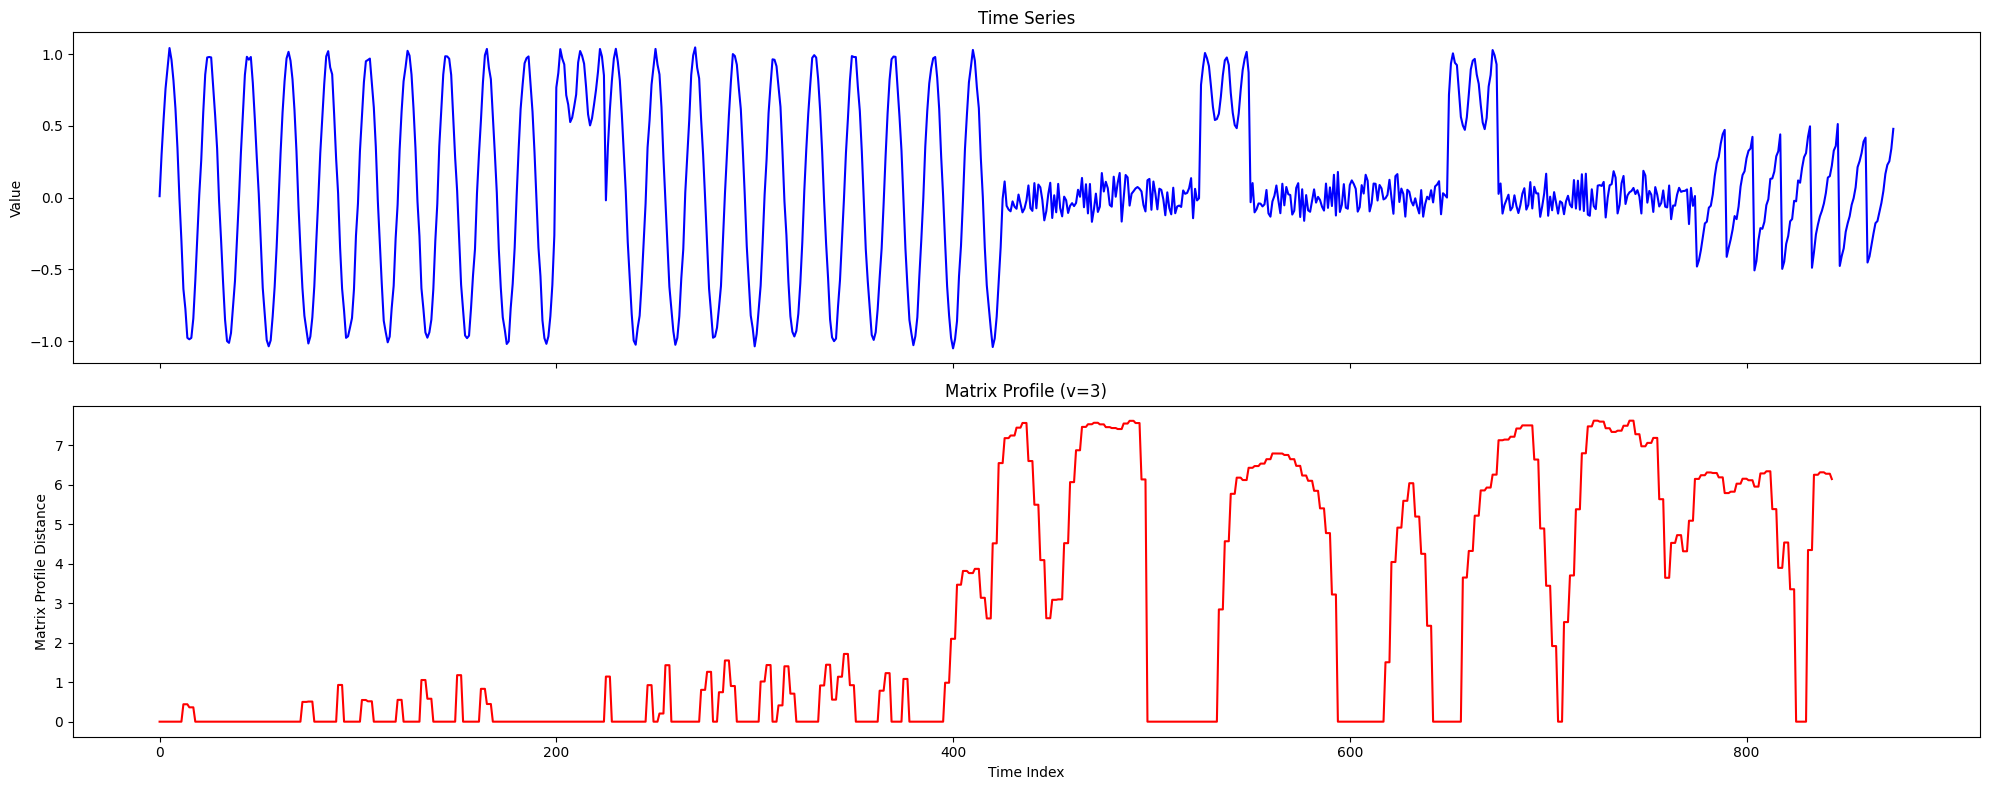

In [8]:
mp_full = np.full_like(mp, np.nan)
valid_indices = np.arange(0, len(mp), v)

mp_full[valid_indices] = mp[valid_indices]

mp_filled = mp_full.copy()
for i in range(1, len(mp_filled)):
    if np.isnan(mp_filled[i]):
        mp_filled[i] = mp_filled[i-1]

# Plot
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(20,8))
ax1.plot(pattern, color='blue')
ax1.set_ylabel("Value")
ax1.set_title("Time Series")

ax2.plot(mp_filled, 'r-')  
ax2.set_ylabel("Matrix Profile Distance")
ax2.set_title(f"Matrix Profile (v={v})")
ax2.set_xlabel("Time Index")

plt.tight_layout()
plt.show()

# Load and visualize sample data of London weather in 2020

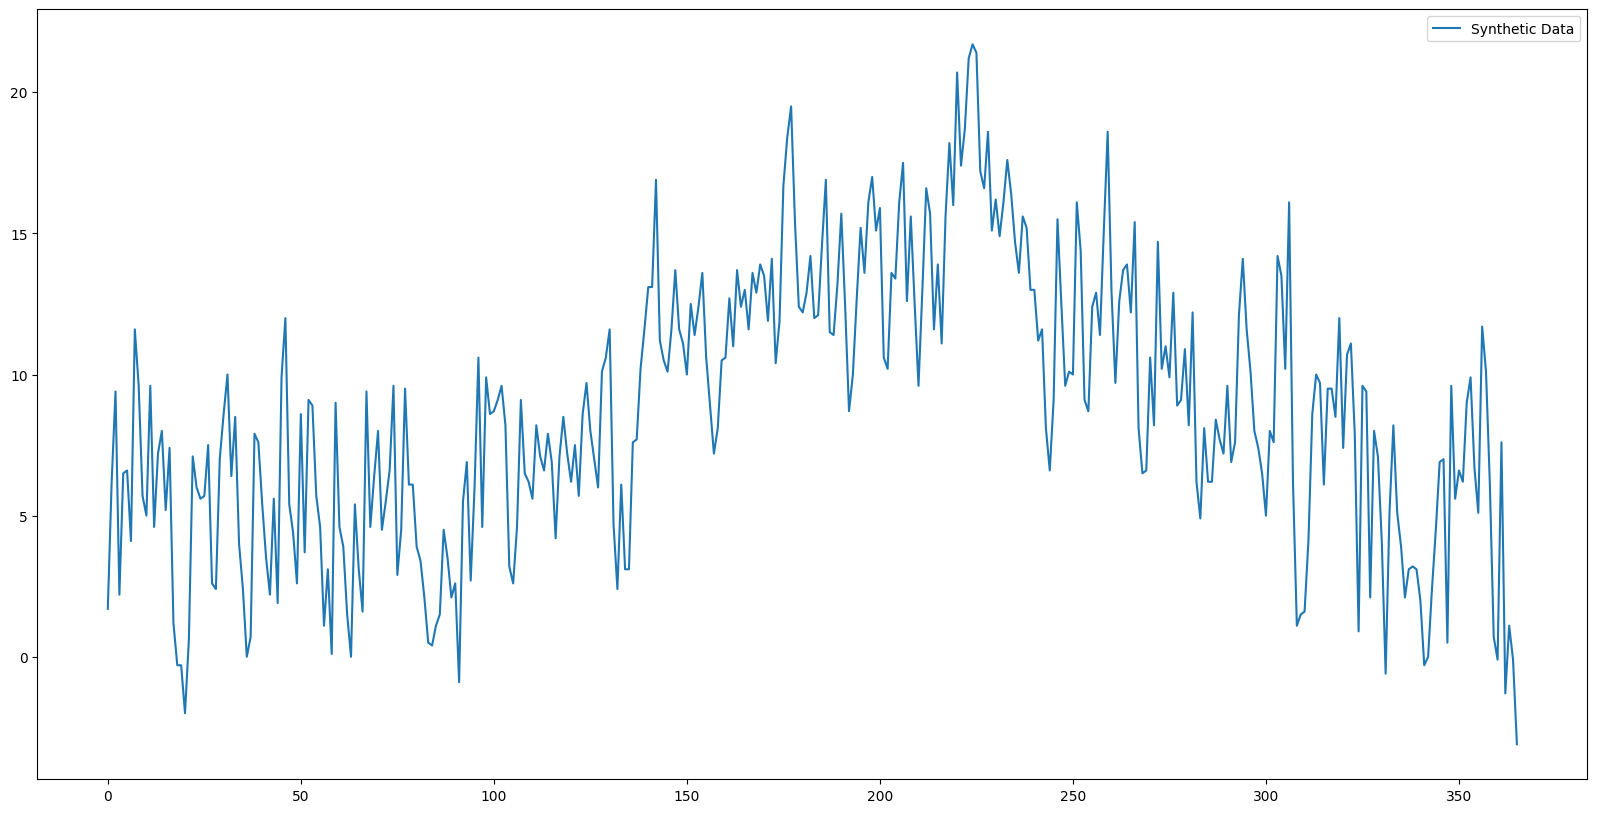

In [9]:
london = pd.read_csv("london_weather.csv")
london['date'] = pd.to_datetime(london['date'])

min_temp = london['min_temp'].copy()

# find the indexes of the missing values
nan_indices = min_temp[min_temp.isna()].index

#if there is a missing value replace it with the average of the day before and after 
for idx in nan_indices:
    if 0 < idx < len(min_temp) - 1:
        prev_val = min_temp.iloc[idx - 1]
        next_val = min_temp.iloc[idx + 1]
        if not pd.isna(prev_val) and not pd.isna(next_val):
            min_temp.iloc[idx] = (prev_val + next_val) / 2


london['min_temp'] = min_temp

weather_london = london['min_temp'].values

#Plot data
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(len(weather_london)),weather_london, label="Synthetic Data")
legend = ax1.legend(loc='upper right')



# Calculate the Matrix Profile

## **v=1**

Text(0.5, 0, 'Sample')

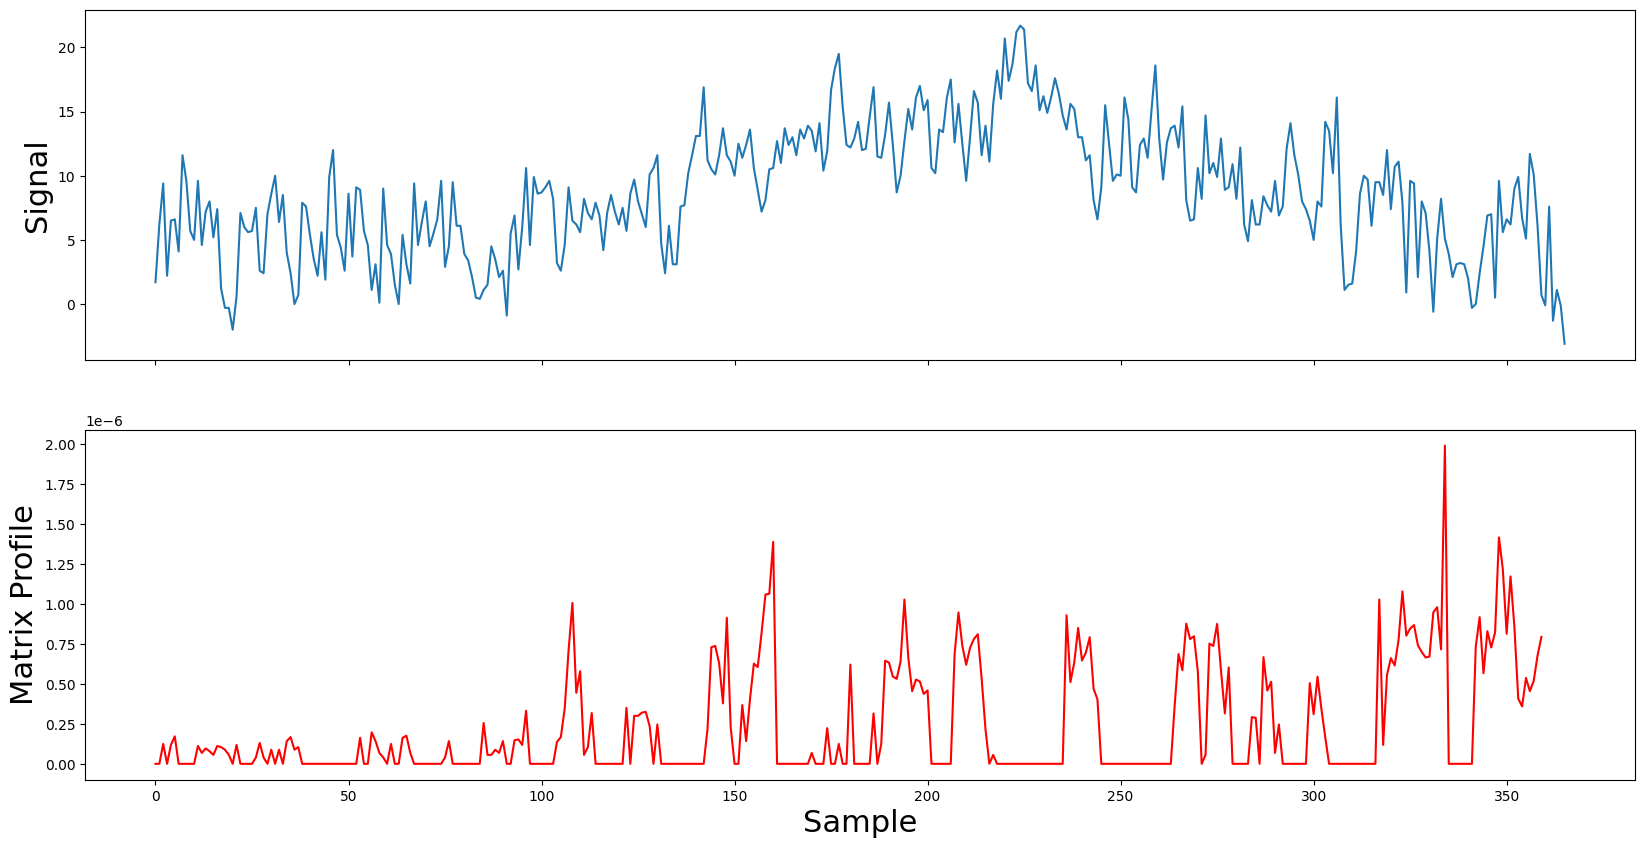

In [10]:
m = 7
v = 1
mp_l = matrixProfile.stmp(weather_london, m, v)

#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj_l = np.append(mp_l[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(weather_london)),weather_london, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj_l)),mp_adj_l, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)


## **v=2**

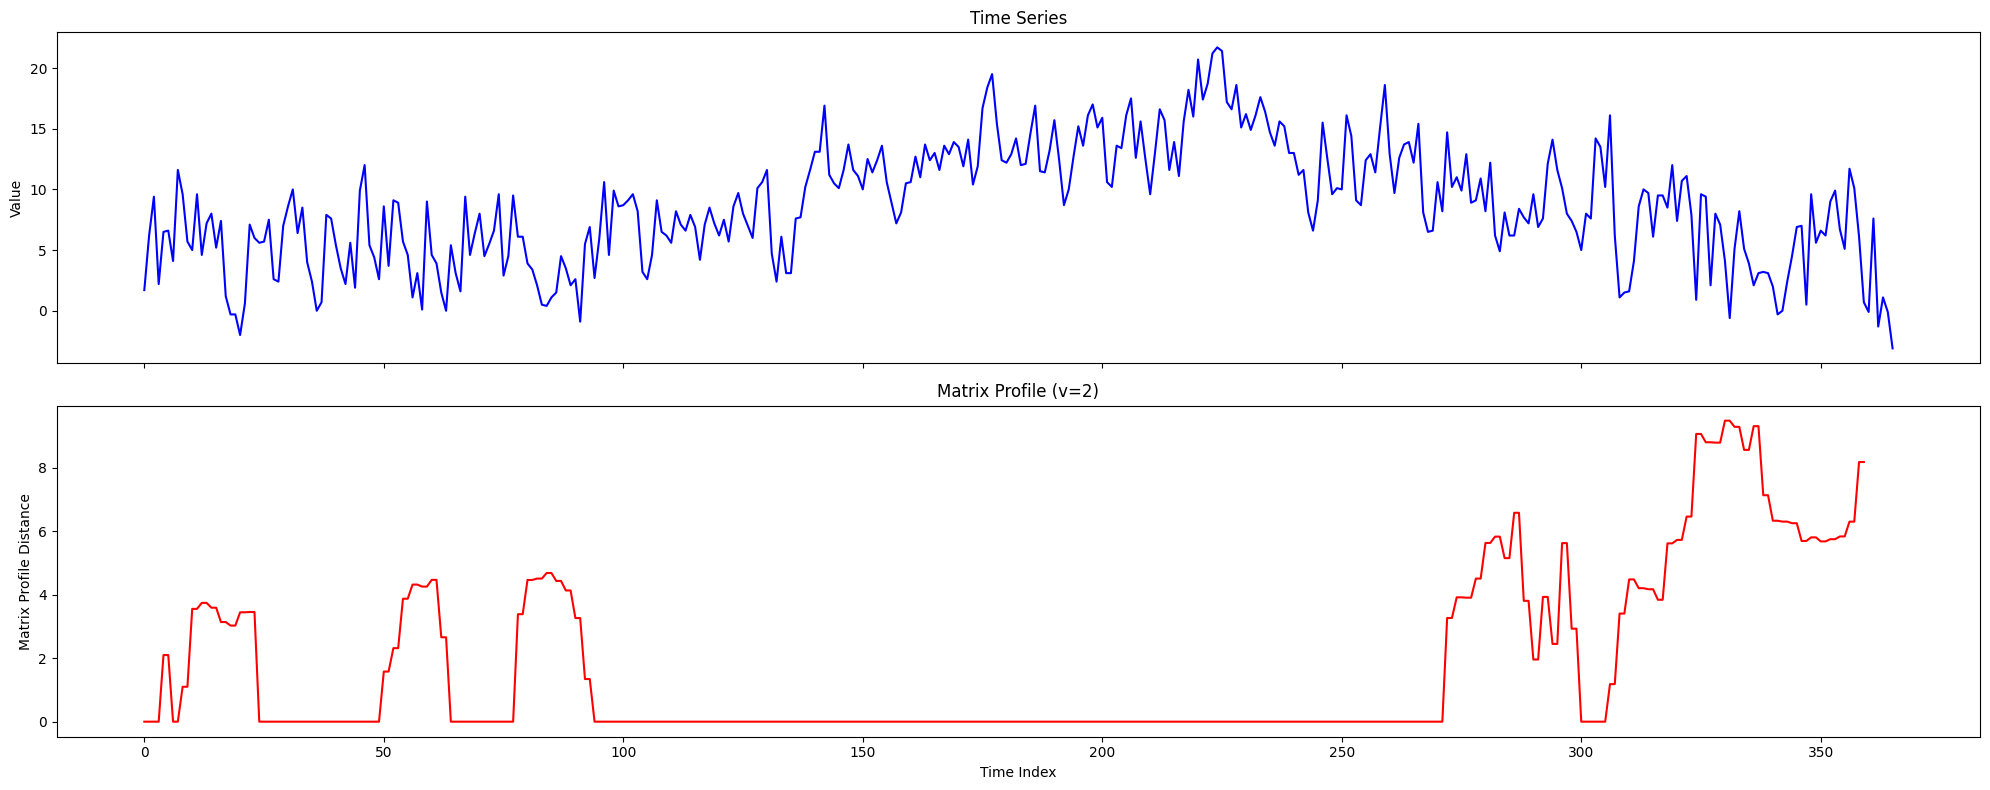

In [11]:
m = 7
v = 2
mp_l2,mpi_l2 = matrixProfile.stmp(weather_london, m, v)


mp_full_l = np.full_like(mp_l2, np.nan)
valid_indices_l = np.arange(0, len(mp_l2), v)

mp_full_l[valid_indices_l] = mp_l2[valid_indices_l]

mp_filled_l = mp_full_l.copy()
for i in range(1, len(mp_filled_l)):
    if np.isnan(mp_filled_l[i]):
        mp_filled_l[i] = mp_filled_l[i-1]

# Plot
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(20,8))
ax1.plot(weather_london, color='blue')
ax1.set_ylabel("Value")
ax1.set_title("Time Series")

ax2.plot(mp_filled_l, 'r-')  
ax2.set_ylabel("Matrix Profile Distance")
ax2.set_title(f"Matrix Profile (v={v})")
ax2.set_xlabel("Time Index")

plt.tight_layout()
plt.show()

## **v=3**

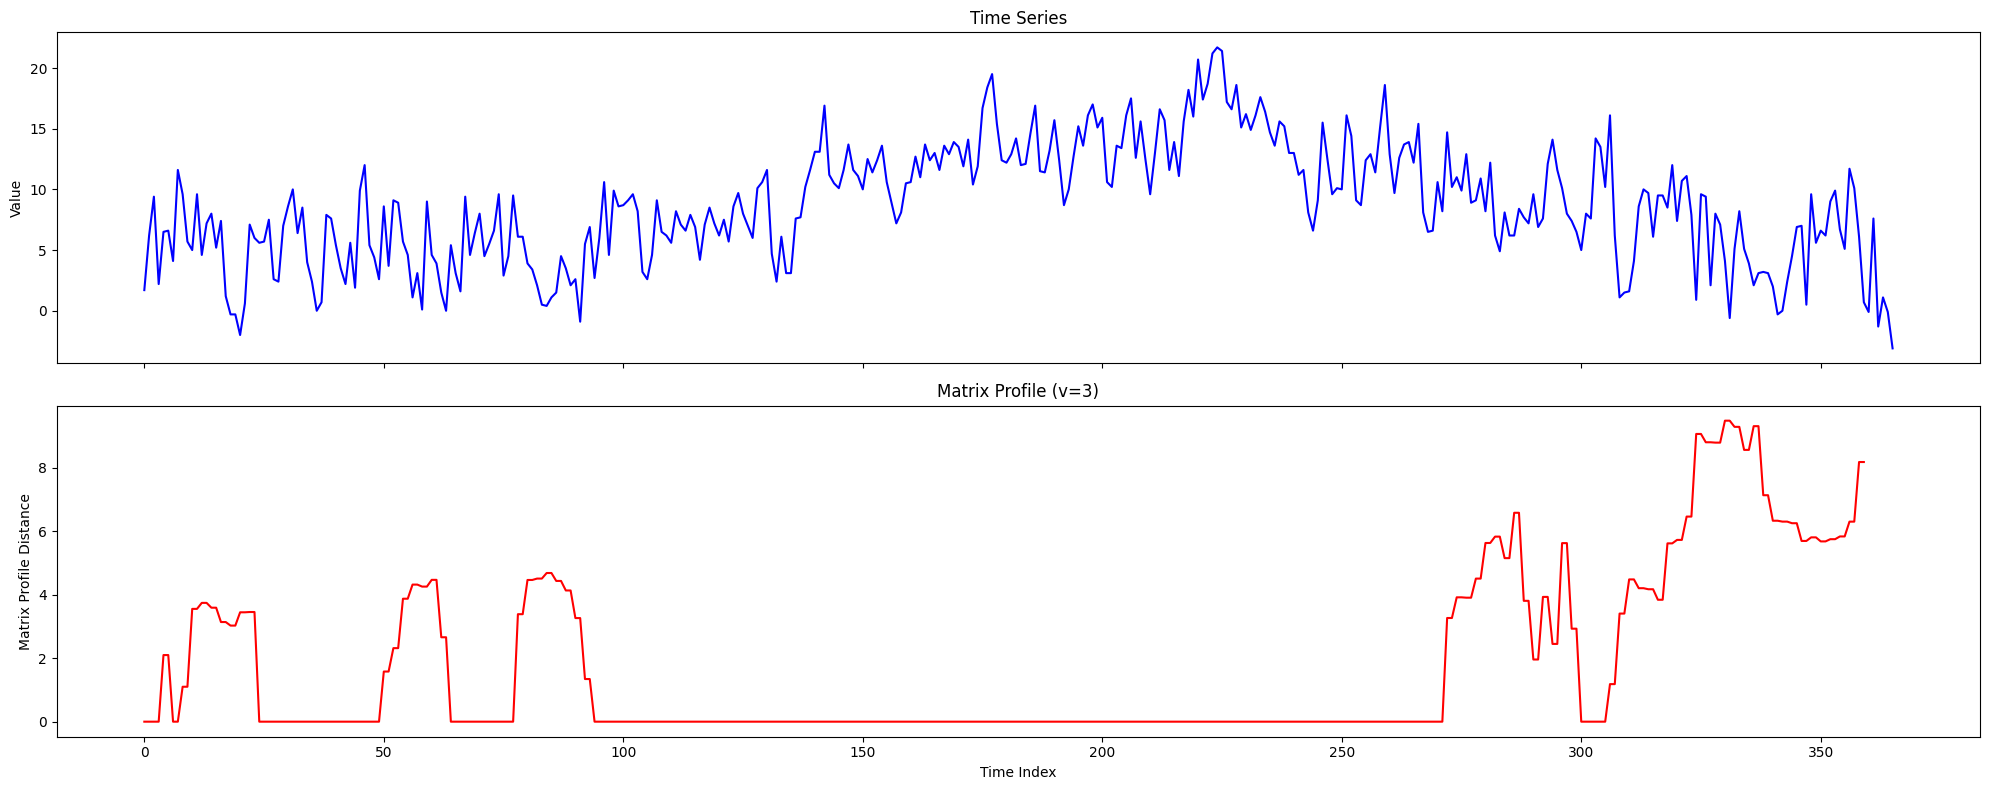

In [12]:
v = 3
mp_l3,mpi_l3 = matrixProfile.stmp(weather_london, m, v)


mp_full_l3 = np.full_like(mp_l3, np.nan)
valid_indices_l3 = np.arange(0, len(mp_l3), v)

mp_full_l3[valid_indices_l3] = mp_l3[valid_indices_l3]

mp_filled_l3 = mp_full_l.copy()
for i in range(1, len(mp_filled_l3)):
    if np.isnan(mp_filled_l3[i]):
        mp_filled_l3[i] = mp_filled_l3[i-1]

# Plot
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(20,8))
ax1.plot(weather_london, color='blue')
ax1.set_ylabel("Value")
ax1.set_title("Time Series")

ax2.plot(mp_filled_l3, 'r-')  
ax2.set_ylabel("Matrix Profile Distance")
ax2.set_title(f"Matrix Profile (v={v})")
ax2.set_xlabel("Time Index")

plt.tight_layout()
plt.show()